# Test mask modification

In ComputeOceanDynamicSeaLevel.py we use the land/sea mask from AR5. This mask has a strange closure of the Mediterranean sea. This is removed here. If not removed when the model data are interpollated on this grid using this mask it looks like all models have a closed Mediterranean sea which is not the case.

In [11]:
import sys

import xarray as xr

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

sys.path.append('../code/')
import mod_loc as loc


In [17]:
# Read the regular 1*1 grid to use for regridded outputs
dir_inputs = '../inputs/'
mask_ds = xr.open_dataset(dir_inputs+'reference_masks.nc')

mask_ds = loc.rotate_longitude(mask_ds, 'lon')

### Mask before modification

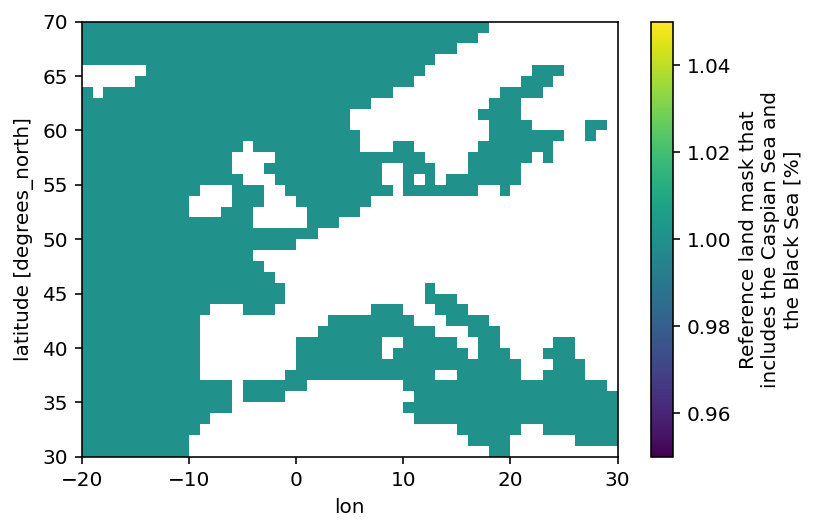

In [18]:
mask_ds.sel(lat=slice(30,70), lon=slice(-20,30)).mask.plot()

In [19]:
mask_ds['mask'].loc[dict(lat=slice(34,36), lon=-5.5)] = 1

### Mask after modification

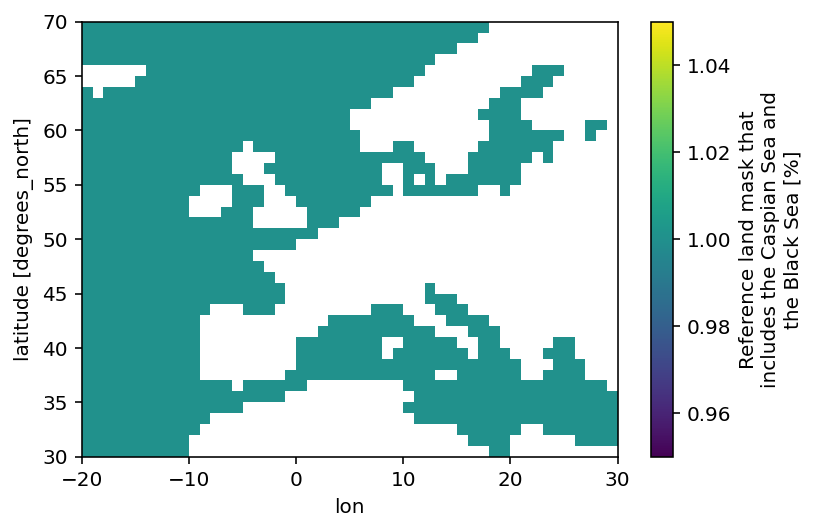

In [20]:
mask_ds.sel(lat=slice(30,70), lon=slice(-20,30)).mask.plot()